In [39]:
import sys
sys.path.append('../')
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import experiment


Training Two-Layer Network...

Training Three-Layer Network...

Training Three-Layer (Last Layer Only)...


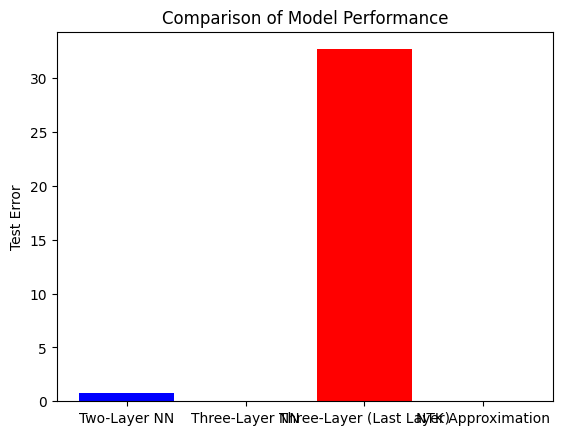

In [4]:
experiment.main_experiment()


Training with N = 200

Training with N = 500

Training with N = 1000

Training with N = 2000

Training with N = 5000

Training with N = 10000


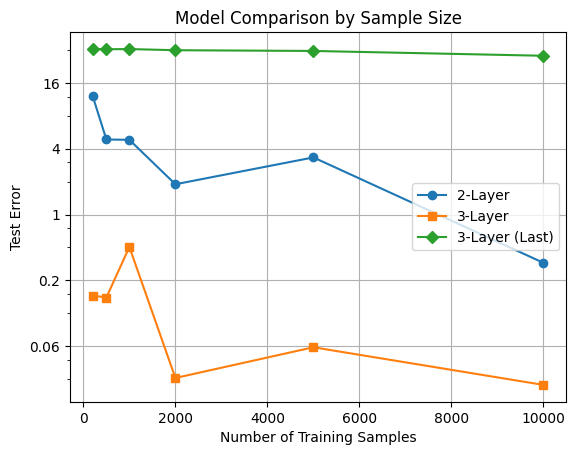

In [5]:
N_list = [200, 500, 1000, 2000, 5000, 10000]
experiment.compare_models_with_samples(
    N_list=N_list, hidden_dim1=200, hidden_dim2=100, epochs=500
)

100%|██████████| 4/4 [02:05<00:00, 31.30s/it]


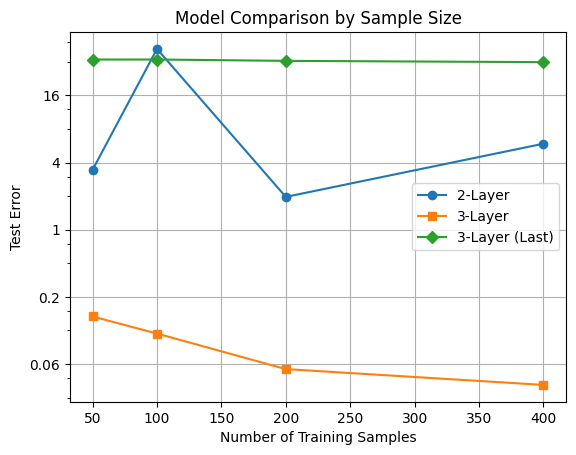

In [5]:
neuron_list = [50, 100, 200, 400]
experiment.compare_models_with_neurons(neuron_list=neuron_list, N=1000, epochs=500)

# Exemple théorème 3 layers

In [4]:
from src import dataprep, modelling, dataviz
import logging
from tqdm import tqdm

In [113]:
# F* is the target function, we will take a 3 layers Neural netwroks with sigmoid as infinite smooth activation function
N = 1000
epochs = 10000
p1 = 100
p2 = 50
x_train, y_train = dataprep.generate_data(N)
x_test, y_test = dataprep.generate_data(200)
target_func = modelling.ThreeLayerNN(input_dim=4, 
                               hidden_dim1=p1, 
                               hidden_dim2=p2, 
                               acti='sigmoid')
modelling.train_network(target_func, x_train, y_train, opti='Adam', epochs=epochs)
OPT = modelling.evaluate_model(target_func, x_test, y_test)

100%|██████████| 10000/10000 [16:19<00:00, 10.21it/s]


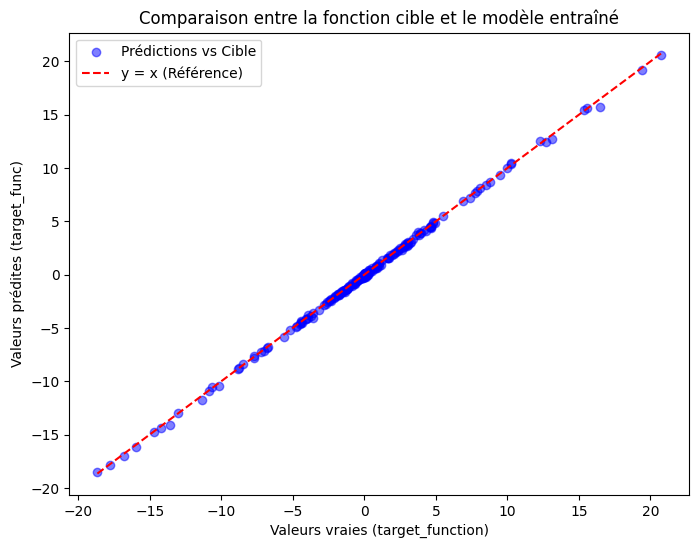

In [114]:
import matplotlib.pyplot as plt
# Calcul des valeurs de la fonction cible sur x_test
y_true = dataprep.target_function(x_test)

# Prédiction de target_func sur x_test
y_pred = target_func(x_test).detach().numpy()  
# Tracé du graphique
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label="Prédictions vs Cible")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label="y = x (Référence)")
plt.xlabel("Valeurs vraies (target_function)")
plt.ylabel("Valeurs prédites (target_func)")
plt.title("Comparaison entre la fonction cible et le modèle entraîné")
plt.legend()
plt.show()

In [115]:
OPT

0.023270208

In [120]:
def compute_epsilon(epsilon0, k, p1, p2, Cs_phi, Cs_Phi):
    return epsilon0 / (k * p1 * ((p2)**2) * Cs_Phi * ((Cs_phi)**2))

def poly_bivar(x1, x2, k1, k2, constante = 1):
    return x1**k1 + x2**k2 + constante

gamma = 1/8
epsilon0 = 1e-2
k = 1
Cs_sigmoid = 1
Cs_phi = 1  # Approximation pour sigmoïde
Cs_Phi = 1  # Approximation pour la couche de sortie
epsilon = compute_epsilon(epsilon0, k, p1, p2, Cs_phi, Cs_Phi)
M = int(poly_bivar(p2**(0.5), 1/epsilon, k1=1, k2=0, constante=198)) # ----- CHOIX M -----

# Paramètres donnés
m1 = M  # Exemple de valeur pour m1
m2 = m1   # m2 = m1
epsilona = 1  # εa = 1 donc ε0 = 1
C0 = p1*p2*k  # Exemple pour C0

# Calcul des différentes quantités
tau_0_v = (1 / np.sqrt(epsilon0)) * (m1**(1/2 - 0.005)) * (1 / m2**(1/2))
tau_0_w = (C0 / epsilon0**(1/4)) * (1 / m1**(3/4 - 0.005))
lambda_v = 2 * (tau_0_v ** 2)
lambda_w = 2 * (tau_0_w ** 4)
sigma_v = 1 / m2**(1/2 + 0.01)
sigma_w = 1 / m1**(1 - 0.01)
tau_v = (m1**(1/2 - 0.001)) * (1 / m2**(1/2)) * tau_0_v
tau_w = (1 / m1**(3/4 - 0.01)) * tau_0_w

N_lowerbound = int(np.sqrt(p2) * 1 * (np.sqrt(p2 * p1 * k**2) / epsilon0**2)*1e-3/5) # ----- CHOIX N -----
lr = 1/(poly_bivar(m1, m2, k1=0, k2=0, constante=98)) # ----- CHOIX lr -----
T = poly_bivar(m1, m2, k1=1, k2=1, constante=200) # ----- CHOIX T -----
Tw = int(T / 10)  # Nombre d'itérations internes

In [121]:
print({
    "M": M,
    "N": N_lowerbound,
    "lr": lr,
    "Epochs": T
})

{'M': 206, 'N': 1000, 'lr': 0.01, 'Epochs': 612}


In [122]:
x_train, y_train = dataprep.generate_data(N_lowerbound)
x_test, y_test = dataprep.generate_data(200)
approx_func = modelling.ThreeLayerNN(input_dim=4, 
                               hidden_dim1=m1, 
                               hidden_dim2=m2, 
                               acti='ReLU')
modelling.train_network(approx_func, x_train, y_train, lr=lr, opti='SGD', epochs=T)

100%|██████████| 612/612 [00:53<00:00, 11.35it/s]


In [123]:
err = modelling.evaluate_model(approx_func, x_test, y_test)

In [124]:
err

0.029498393

In [125]:
OPT

0.023270208

In [126]:
err <= (1+gamma)*OPT + epsilon0

True

In [127]:
(1+gamma)*OPT + epsilon0

0.036178984437137844